# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Objetivo de la práctica
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

## Parte 1: Construcción de la matriz término-documento y TF-IDF

### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
   - Frecuencia absoluta (TF)
   - TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

In [2]:
# Parte 1
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA


# Parte 2
from sklearn.metrics.pairwise import cosine_similarity

In [43]:
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

# Creación del vocabulario
vocabulary = set()
for doc in documents:
    for word in doc.lower().strip(".").split(sep=" "):
        vocabulary.add(word)
print(vocabulary)
print(len(vocabulary))


# Representación TF
tf_dictionary = {}
i = 0
for doc in documents:
    tfd_dictionary = {}
    
    for term in vocabulary:
        count = doc.lower().strip(".").count(term)
        tfd_dictionary[term] = count
    tf_dictionary[i] = tfd_dictionary
    i += 1
print(tf_dictionary)


# Representación  IDF
N = len(documents)
idf_dictionary = {}
for term in vocabulary:
    count = 0
    for doc in documents:
        if term in doc.lower().strip("."):
            count += 1
    idf_dictionary[term] = np.log(N / (count + 1)) # Sumar 1 para evitar división por cero
print("IDF Dictionary:", idf_dictionary)

# Representación TF-IDF
tfidf_dictionary = {}
for doc_idx, tfd in tf_dictionary.items():
    tfidf_dict = {}
    for term, tf in tfd.items():
        tfidf_dict[term] = tf * idf_dictionary.get(term, 0)  # Asignar IDF (0 si no existe)
    tfidf_dictionary[doc_idx] = tfidf_dict
print("TF-IDF Dictionary:", tfidf_dictionary)


{'importante', 'estaba', 'limpia', 'y', 'gato', 'cama', 'del', 'debajo', 'jardín', 'en', 'jugaron', 'cómoda', 'la', 'se', 'es', 'perro', 'de', 'limpieza', 'escondió', 'el'}
20
{0: {'importante': 0, 'estaba': 0, 'limpia': 0, 'y': 0, 'gato': 1, 'cama': 1, 'del': 0, 'debajo': 1, 'jardín': 0, 'en': 0, 'jugaron': 0, 'cómoda': 0, 'la': 1, 'se': 1, 'es': 1, 'perro': 0, 'de': 2, 'limpieza': 0, 'escondió': 1, 'el': 1}, 1: {'importante': 0, 'estaba': 1, 'limpia': 1, 'y': 1, 'gato': 0, 'cama': 1, 'del': 0, 'debajo': 0, 'jardín': 0, 'en': 0, 'jugaron': 0, 'cómoda': 1, 'la': 1, 'se': 0, 'es': 1, 'perro': 0, 'de': 0, 'limpieza': 0, 'escondió': 0, 'el': 0}, 2: {'importante': 0, 'estaba': 0, 'limpia': 0, 'y': 1, 'gato': 1, 'cama': 0, 'del': 0, 'debajo': 0, 'jardín': 1, 'en': 1, 'jugaron': 1, 'cómoda': 0, 'la': 0, 'se': 0, 'es': 0, 'perro': 1, 'de': 0, 'limpieza': 0, 'escondió': 0, 'el': 3}, 3: {'importante': 1, 'estaba': 0, 'limpia': 0, 'y': 0, 'gato': 0, 'cama': 0, 'del': 1, 'debajo': 0, 'jardín': 1,

In [36]:
X_tf = pd.DataFrame(tf_dictionary).T
X_tf

,importante,estaba,limpia,y,gato,cama,del,debajo,jardín,en,jugaron,cómoda,la,se,es,perro,de,limpieza,escondió,el
0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1
1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,3
3,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0


In [37]:
X_tfidf = pd.DataFrame(tfidf_dictionary).T
X_tfidf

,importante,estaba,limpia,y,gato,cama,del,debajo,jardín,en,jugaron,cómoda,la,se,es,perro,de,limpieza,escondió,el
0,0.000000,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.0,0.693147,0.0,0.000000,0.287682,0.000000,0.693147,0.0
1,0.000000,0.693147,0.693147,0.287682,0.000000,0.287682,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.000000,0.000000,0.287682,0.693147,0.693147,0.000000,0.0,0.000000,0.0,0.693147,0.000000,0.000000,0.000000,0.0
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.287682,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.693147,0.000000,0.0


In [ ]:
X_tfidf.to_csv("MatrizTF.csv", index=True)

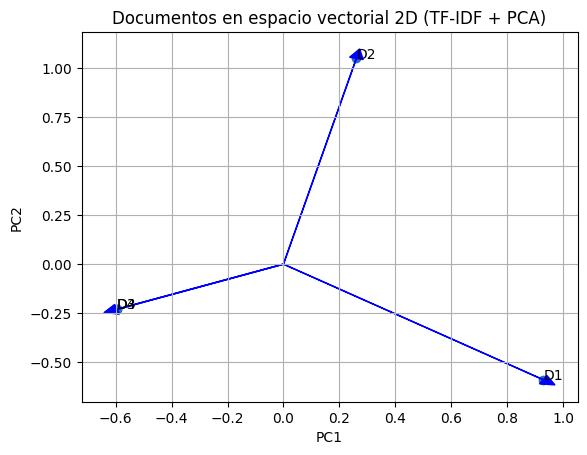

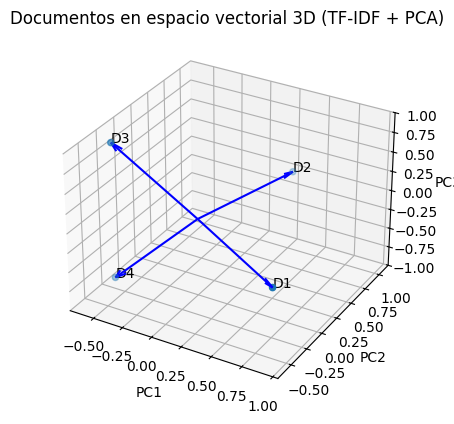

In [38]:
# Reducción PCA y visualización 2D
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(X_tfidf)

plt.scatter(docs_2d[:,0], docs_2d[:,1])

for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    plt.annotate(txt, (docs_2d[i,0], docs_2d[i,1]))
# Dibujar vectores desde el origen
for x, y in docs_2d:
    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc='blue', ec='blue')

plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

#Reducción PCA y visualización 3D
pca_3d = PCA(n_components=3)
docs_3d = pca_3d.fit_transform(X_tfidf)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(docs_3d[:,0], docs_3d[:,1], docs_3d[:,2])

for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    ax.text(docs_3d[i,0], docs_3d[i,1], docs_3d[i,2], txt)
    # Dibujar vectores desde el origen en 3D
for x, y, z in docs_3d:
    ax.quiver(0, 0, 0, x, y, z, arrow_length_ratio=0.1, color='blue')

ax.set_title("Documentos en espacio vectorial 3D (TF-IDF + PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

## Parte 2: Representación de la consulta como vector

### Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

In [46]:
# Creación de la consulta
Query = "Gato en el jardín"
Tokenized_query = Query.lower().strip(".").split()
print(Tokenized_query)

# Vectorización de la consulta
query_tfidf_vector = []
for term in vocabulary:
    tf = Query.lower().strip(".").count(term)
    idf = idf_dictionary.get(term, 0)
    query_tfidf_vector.append(tf * idf)

# Convertir query_tfidf_vector a un DataFrame (1 fila, N columnas)
query_vector_df = pd.DataFrame([query_tfidf_vector], columns=list(vocabulary))
print(query_vector_df)

# Similaridad coseno
similarities = cosine_similarity(query_vector_df, X_tfidf)
print(similarities)




['gato', 'en', 'el', 'jardín']
   importante  estaba  limpia    y      gato  cama  del  debajo    jardín  \
0         0.0     0.0     0.0  0.0  0.287682   0.0  0.0     0.0  0.287682   

         en  jugaron  cómoda   la   se   es  perro   de  limpieza  escondió  \
0  0.693147      0.0     0.0  0.0  0.0  0.0    0.0  0.0       0.0       0.0   

    el  
0  0.0  
[[0.07921737 0.         0.61831602 0.08340809]]


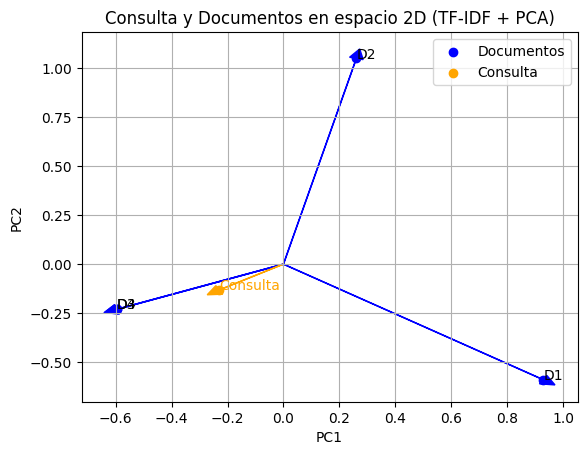

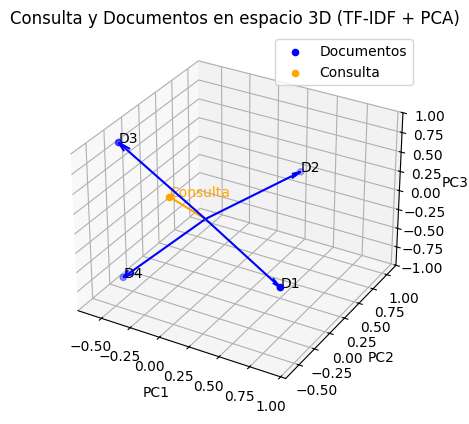

In [48]:
# Proyectar la consulta en el espacio PCA y visualización 2D
query_2d = pca.transform(query_vector_df)
plt.scatter(docs_2d[:,0], docs_2d[:,1], label="Documentos", color='blue')
plt.scatter(query_2d[:,0], query_2d[:,1], color='orange', label="Consulta")


for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    plt.annotate(txt, (docs_2d[i,0], docs_2d[i,1]))

plt.annotate("Consulta", (query_2d[0,0], query_2d[0,1]), color='orange')

# Vectores de documentos (azules)
for x, y in docs_2d:
    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc='blue', ec='blue')

# Vector de consulta (naranja)
plt.arrow(0, 0, query_2d[0,0], query_2d[0,1], head_width=0.05, head_length=0.05, fc='orange', ec='orange')

plt.title("Consulta y Documentos en espacio 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid()
plt.show()


# Proyectar la consulta en el espacio PCA y visualización 3D
query_3d = pca_3d.transform(query_vector_df)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Puntos
ax.scatter(docs_3d[:,0], docs_3d[:,1], docs_3d[:,2], label='Documentos', color='blue')
ax.scatter(query_3d[:,0], query_3d[:,1], query_3d[:,2], color='orange', label='Consulta')

# Etiquetas
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    ax.text(docs_3d[i,0], docs_3d[i,1], docs_3d[i,2], txt)

ax.text(query_3d[0,0], query_3d[0,1], query_3d[0,2], "Consulta", color='orange')

# Vectores de documentos (azul)
for x, y, z in docs_3d:
    ax.quiver(0, 0, 0, x, y, z, arrow_length_ratio=0.1, color='blue')

# Vector de consulta (naranja)
ax.quiver(0, 0, 0, query_3d[0,0], query_3d[0,1], query_3d[0,2], arrow_length_ratio=0.1, color='orange')

ax.set_title("Consulta y Documentos en espacio 3D (TF-IDF + PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()
plt.show()

## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`

In [ ]:
def search_relevant_documents(query, vocabulary, idf_dictionary, X_tfidf, documents):
    # Tokenizar la consulta
    query_vector = []
    for term in vocabulary:
        tf = query.lower().strip(".").count(term)
        idf = idf_dictionary.get(term, 0)
        query_vector.append(tf * idf)
    
    # Convertir la consulta a un DataFrame (1 fila, N columnas)
    query_vector_df = pd.DataFrame([query_vector], columns=list(vocabulary))
    
    # Calcular la similitud coseno
    similarities = cosine_similarity(query_vector_df, X_tfidf)[0]
    
    results = [(i, documents[i], similarities[i]) for i in range(len(similarities))]
    
    return results, query_vector_df

test_query = "gato en el jardín"
results, query_vector_df = search_relevant_documents(test_query, vocabulary, idf_dictionary, X_tfidf, documents)
print(results)


[(0, 'El gato se escondió debajo de la cama.', np.float64(0.0792173683025682)), (1, 'La cama estaba limpia y cómoda.', np.float64(0.0)), (2, 'El perro y el gato jugaron en el jardín.', np.float64(0.6183160205429438)), (3, 'La limpieza del jardín es importante.', np.float64(0.08340808899539263))]
